In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc, classification_report
import matplotlib.pyplot as plt

df = pd.read_csv('data.csv')
df = df.drop(columns={'SUS', 'Unnamed: 6'}, axis=1)
y = df['Purchase'].copy()
x = df.drop(columns={'Purchase'}, axis=1)
x = StandardScaler().fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y)

logReg = LogisticRegression()
logReg.fit(x_train, y_train)

svm = SVC(probability=True)
svm.fit(x_train, y_train)

bayes = GaussianNB()
bayes.fit(x_train, y_train)

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [2]:
y_logReg_predicted = logReg.predict(x_test)
y_logReg_pred_proba = logReg.predict_proba(x_test)

y_svm_predicted = svm.predict(x_test)
y_svm_pred_proba = svm.predict_proba(x_test)

y_bayes_predicted = bayes.predict(x_test)
y_bayes_pred_proba = bayes.predict_proba(x_test)

y_rfc_predicted = rfc.predict(x_test)
y_rfc_pred_proba = rfc.predict_proba(x_test)

print('Logistic Regression')
print(classification_report(y_test, y_logReg_predicted))

print('SVM')
print(classification_report(y_test, y_svm_predicted))

print('Naive Bayes')
print(classification_report(y_test, y_bayes_predicted))

print('Random Forest')
print(classification_report(y_test, y_rfc_predicted))

Logistic Regression
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.93      0.93      0.93        15

    accuracy                           0.92        25
   macro avg       0.92      0.92      0.92        25
weighted avg       0.92      0.92      0.92        25

SVM
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.93      0.93      0.93        15

    accuracy                           0.92        25
   macro avg       0.92      0.92      0.92        25
weighted avg       0.92      0.92      0.92        25

Naive Bayes
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.93      0.93      0.93        15

    accuracy                           0.92        25
   macro avg       0.92      0.92      0.92        25
weighted avg       0.92      0.92     

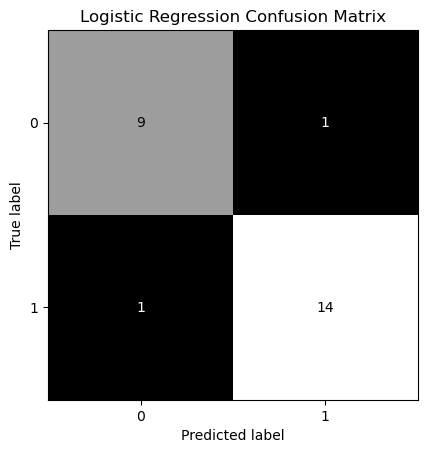

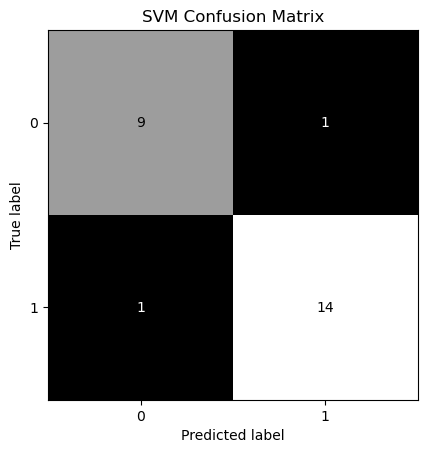

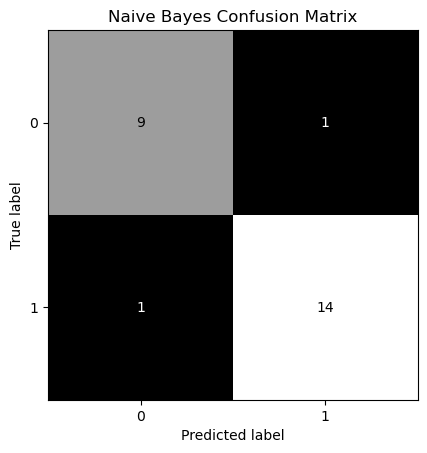

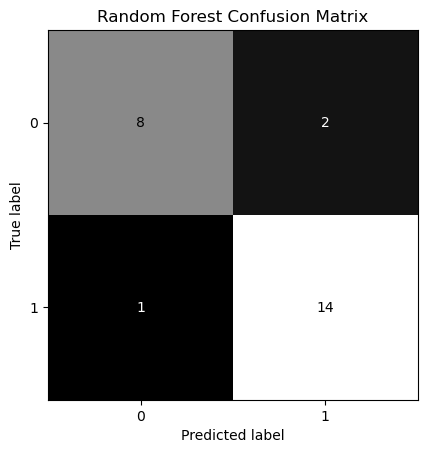

In [3]:
models = ['Logistic Regression', 'SVM', 'Naive Bayes', 'Random Forest']
predictions = [y_logReg_predicted, y_svm_predicted, y_bayes_predicted, y_rfc_predicted]
pred_probabilities = [y_logReg_pred_proba, y_svm_pred_proba, y_bayes_pred_proba, y_rfc_pred_proba]

for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test.ravel(), prediction))
    disp.plot(
        include_values=True,
        cmap='gray',
        colorbar=False
    )
    disp.ax_.set_title(f"{model} Confusion Matrix")

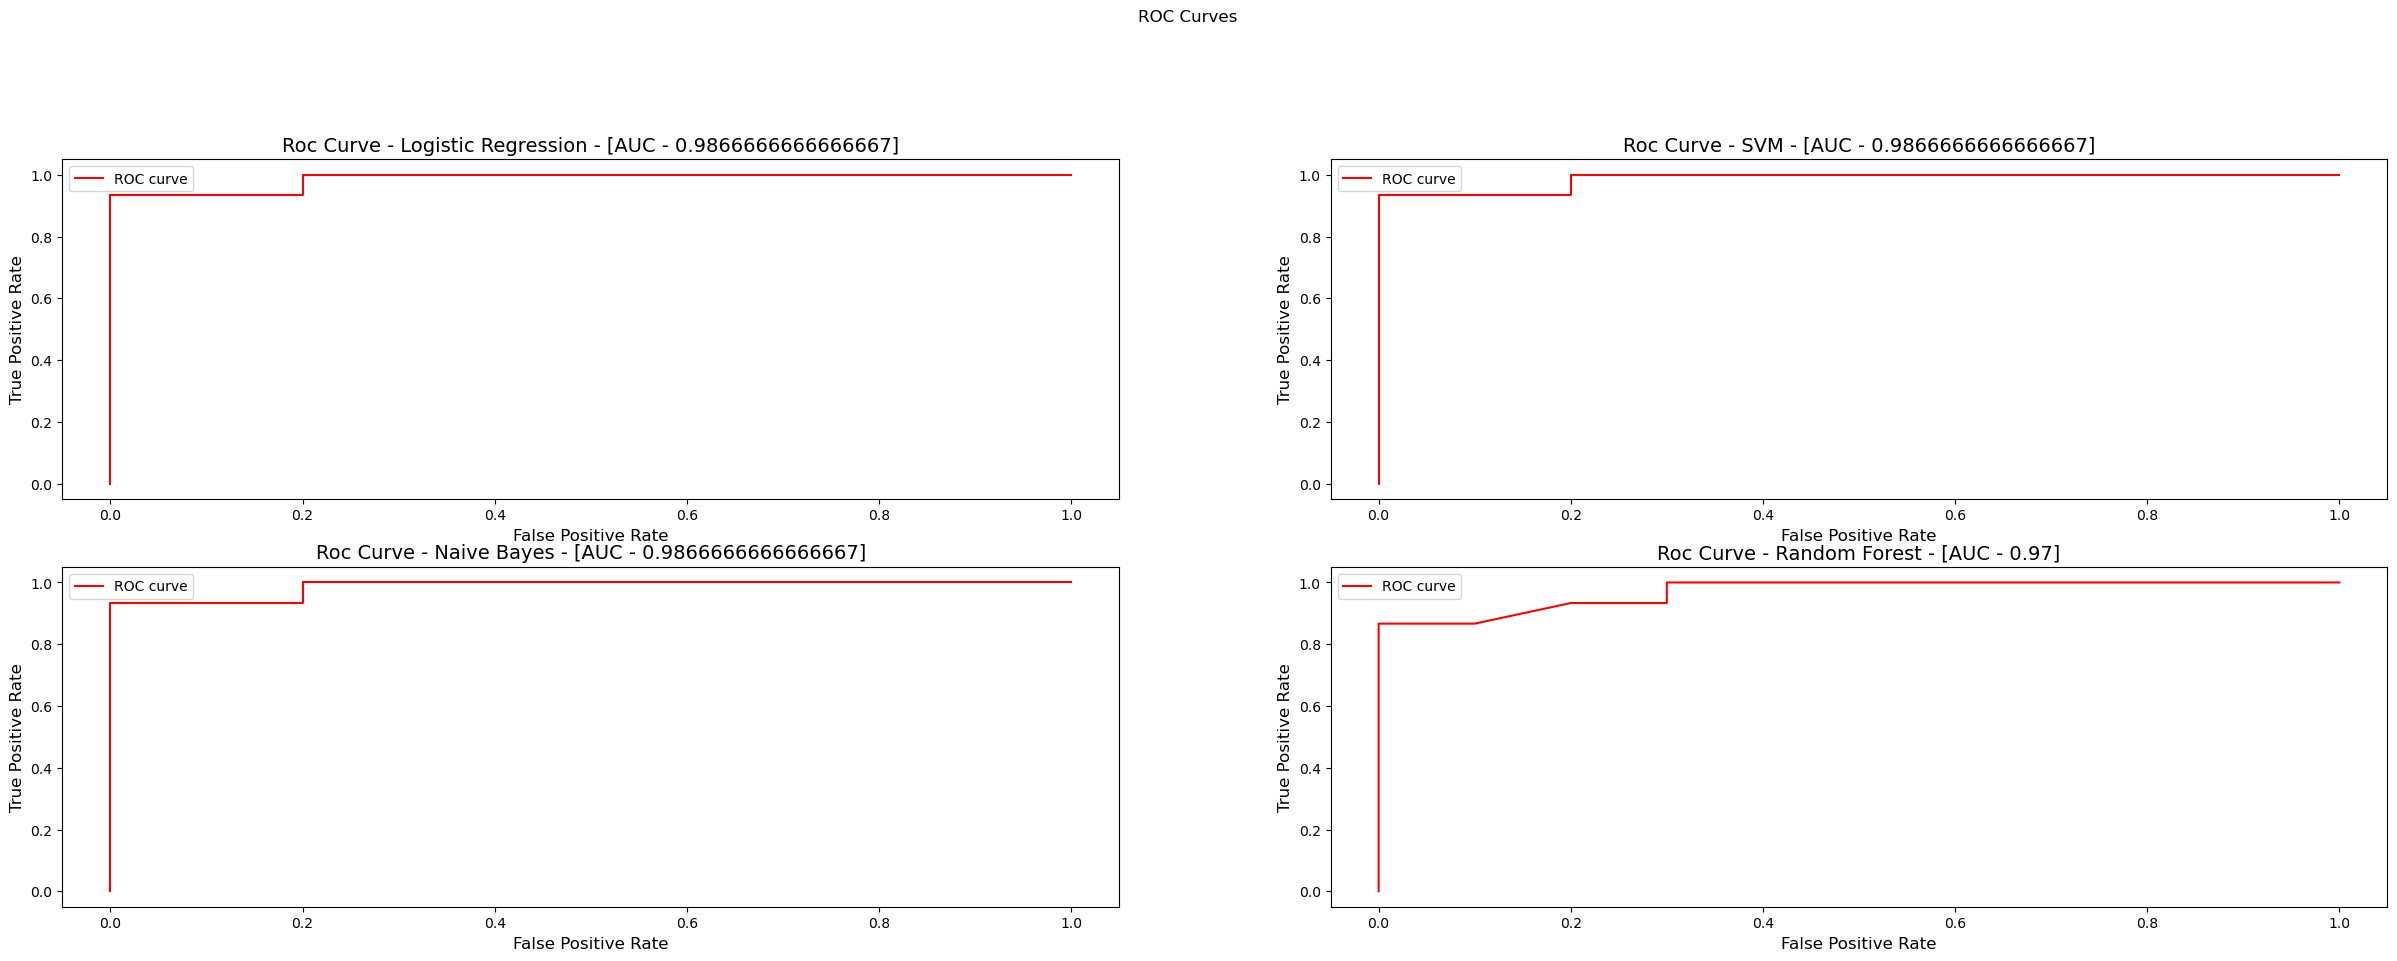

In [4]:
plt.figure(figsize=(30, 15))
plt.suptitle("ROC Curves")
plot_index = 1

for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    fpr, tpr, thresholds = roc_curve(y_test, pred_proba[:, 1])
    auc_score = auc(fpr, tpr)
    plt.subplot(3, 2, plot_index)
    plt.plot(fpr, tpr, 'r', label='ROC curve')
    # pyplot.figure(figsize=(5, 5))
    plt.title(f'Roc Curve - {model} - [AUC - {auc_score}]', fontsize=14)
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.legend()
    plot_index += 1
plt.show()